# Introducció a la pràctica 2

## Objectius

Els objectius d'aquesta pràctica són:
  
* Aplicar models de classificació, ficant l'èmfasi en:
    1. Aplicar diferents classificadors (regressor logístic i svm) i entendre les millores d'aplicar kernels.
    2. Avaluar correctament l'error del model 
    3. Visualitzar les dades i el model resultant


* Ésser capaç d'aplicar tècniques de classificació en casos reals

* Validar els resultats en dades reals

* Fomentar la capacitat per presentar resultats tècnics d'aprenentatge computacional de forma adequada davant altres persones


## Bases de dades

Cada grup utilitzarà les bases de dades que se li hagin assignat depenent del grup on s'ha apuntat al caronte. 


| # | GRUP | BASE DE DADES ASSIGNADA|
|:-:|:-:|:--|
|	1	|	GA\*01-0000	| https://www.kaggle.com/rounakbanik/pokemon	|
|	2	|	GA\*02-0000	| https://www.kaggle.com/adityakadiwal/water-potability/	|
|	3	|	GA\*03-0000	| https://www.kaggle.com/jsphyg/weather-dataset-rattle-package	|
|	4	|	GA\*04-0000	|https://www.kaggle.com/iabhishekofficial/mobile-price-classification	|
|	5	|	GA\*05-0000	|https://www.kaggle.com/kyr7plus/emg-4	|
|	6	|	GA\*06-0000	|https://www.kaggle.com/uciml/glass	|
|	7	|	GA\*07-0000	|https://www.kaggle.com/c/titanic/data	|
|	8	|	GA\*08-0000	|https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset	|





## Avaluació i entregues de la pràctica 2

En la pràctica 2, es presenten diverses tasques per fer una correcta comparativa dels resultats obtinguts per diversos mètodes de classificació numèrica en una mateixa base de dades.

Les entregues s'organitzen en dos nivells d'assoliment dels objectius, incrementals: apartat **B, (sobre 6 punts)**, assoliment baix; apartat **A, (sobre 4 punts)**, assoliment alt. La suma dels 2 apartats serà la nota final de la pràctica 2. Per a realitzar el apartat A, prèviament s'ha d'haver resolt l'apartat B.

Similarment a la sessió de de treball de la pràctica 1, a la sessió de treball es molt recomanat que pregunteu sobre les bases de dades assignades, els problemes que heu de resoldre, per si hi haguéssin errors amb les llibreries o les seves funcions, aclaracions sobre les preguntes a contestar i els metodes a aplicar...

Així, aquesta sessió de treball està orientada a que, els alumnes que vingueu pugueu preguntar i resoldre dubtes sobre les bases de dades que us han estat assignades, preguntar sobre l'objectiu de cada apartat dels enunciats que no us hagi quedat clar, i preguntar sobre els resultats que esteu obtenint a l'hora d'analitzar les dades. A més, podreu veure com els vostres companys estan resolent altres bases de dades, per agafar idees i veure com altres problemes es poden solucionar amb els mètodes que heu vist a classe de teoria.

I en la següent sessió del 10 de novembre s'evaluarà la **pràctica sencera amb els dos apartats**. Caldrà pujar al Caronte el dia abans (9 de novembre) de les 23:59 un ZIP amb el codi, la documentació i el ppt (10 minuts): 

   * Entrega (Apartat B 6pts + Apartat A 4pts)
     1. Memòria en format article explicant els resultats trobats sobre la bases de dades de l'apartat B i els experiments realitzats sobre la base de dades A (10-50 pàgs). (4pts + 2.5pts)
     2. Codi python desenvolupat. (1.5pts + 1pts)
     3. Presentació amb els resultats 4 min màxim. (0.5pts + 0.5pts)


# Apartat (A): Comparativa de models (4pts)

L'objectiu d'aquest apartat és aprendre a comparar el rendiment obtingut amb els diferents models, utilitzant les mètriques adequades: precision-recall, accuracy, corba ROC, F1 score, etc... 

Es tracta d'ordenar per rendiment i descriure el per què dels resultats obtinguts amb els mètodes utilitzats en el següent apartat B.

A continuació us posem el codi bàsic per a una base de dades concreta, en el vostra cas haureu d'utilitzar la que se us ha assignat (veure la taula de dalt).

In [2]:
import pandas as pd

Correct classification Logistic  0.5 % of the data:  0.7733333333333333
Correct classification SVM       0.5 % of the data:  0.7733333333333333
Correct classification Logistic  0.7 % of the data:  0.8444444444444444
Correct classification SVM       0.7 % of the data:  0.7555555555555555
Correct classification Logistic  0.8 % of the data:  0.7
Correct classification SVM       0.8 % of the data:  0.7


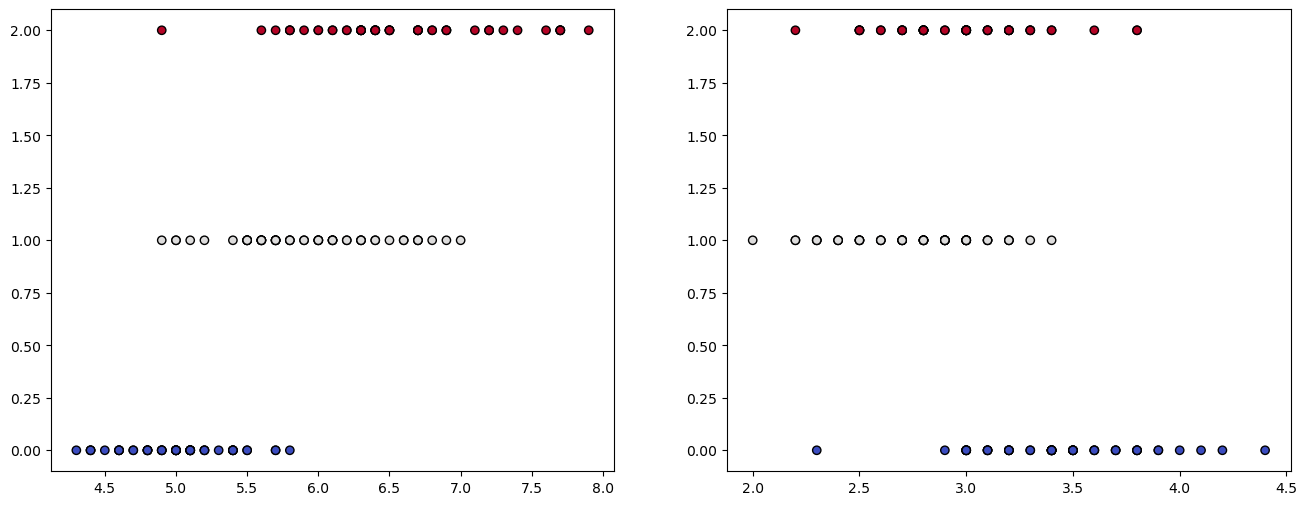

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# import some data to play with
iris = datasets.load_iris()

# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

n_classes = 3
    
fig, sub = plt.subplots(1, 2, figsize=(16,6))
sub[0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')


particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)

    print ("Correct classification Logistic ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Creem el regresor logístic
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM      ", part, "% of the data: ", svc.score(x_v, y_v))


Tal com podeu llegir a [l'API de sklearn](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html), en comptes de fer una corba per cada classe, podem considerar totes les classes en conjunt en una sola corba (1 si hem predit la classe correcta, 0 si no). Això es coneix com a `micro-averaging`. 

Així, veureu que la funció `f1_score` utilitza el paràmetre `macro` per calcular la precision-recall-f1 per clase, i després fer la mitja pr a totes les classes; i `micro` per utilitzar totes les prediccions (i errors de FN, FP) per a calcular una única precision-recall-f1 per a totes les classes juntes.

Si voleu calcular la corba Precision-Recall quan utilitzeu el K-fold, cal calcular les corbes per a cada fold i després [fer la mitja de tots els folds per obtenir la corba final](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py). En el cas del LOOCV no té sentit fer la mitja la corba PR perquè hauriem de fer servir totes les mostres com a $y$.


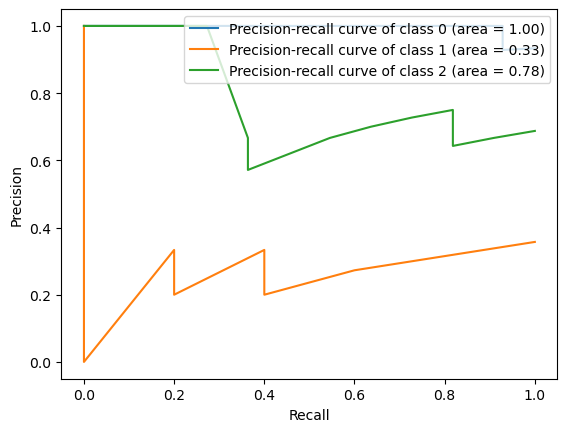

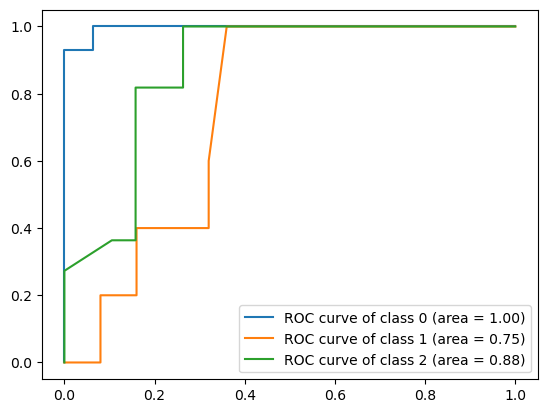

In [4]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(C=1.0, gamma=0.7, degree=3):

    # import some data to play with
    iris = datasets.load_iris()
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = iris.data[:, :2]
    y = iris.target

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=1000000),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C))
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(2, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()


Podeu provar quin efecte té diferents valors de regularització per aquest petit exemple ( C=0.0001 to 1000..). També podeu veure com afecta els valors de degree i gamma. 

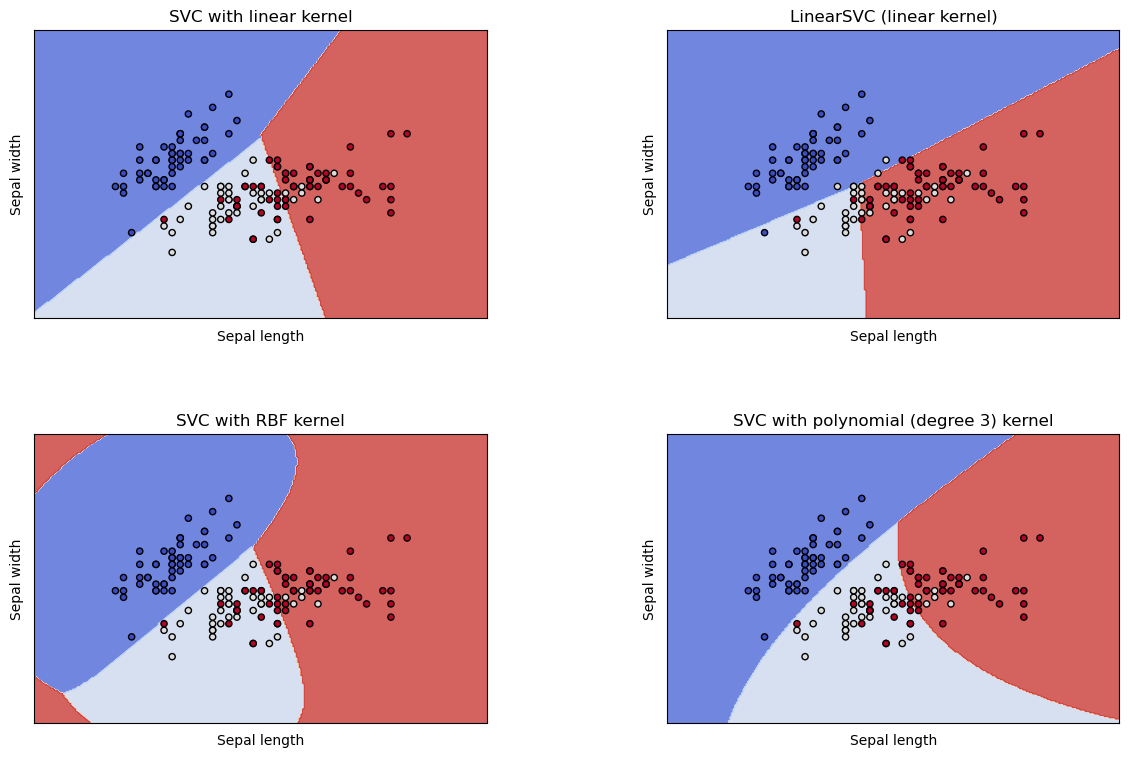

In [6]:
show_C_effect(C=0.1)

# Apartat (B): Classificació Numèrica (6pts)

Per a aquest primer apartat, s'analitzarà els tipus d'atributs que es tenen i, si no està estipulat, **caldrà fixar quin és l'atribut objectiu a classificar de tots els que hi ha a la base de dades**.
Expliqueu a la memòria quin atribut heu fet servir, no hi ha una decisió única correcta, cal que doneu raons de per què heu triat l'atribut que hàgiu triat.

Treballarem varis aspectes de la classificació:

1. EDA (exploratory data analysis)
2. Preprocessing (normalitzation, outlier removal, feature selection..)
3. Model Selection
4. Crossvalidation
5. Metric Analysis
6. Hyperparameter Search


Durant els següents apartats, es recomana anar fent una taula amb el mètode, paràmetres i precisió obtinguda. D'aquesta manera serà més fàcil entendre i valorar què s'aconsegueix en cada metode. Exemple:

<img src="images/table_1.png" width="80%">

Les preguntes de cada apartat són orientatives. **NO** cal contestar-les totes, ni totes tindrán sentit per tots els datasets. Són una guia per a que reflexioneu i aprengueu detalls de cada apartat. Tot i no ser obligatories, si que són molt recomenades d'intentar respondre.

### 1. EDA (exploratory data analysis)

Igual com a la pràctica anterior, exploreu i visualitzeu com és la base de dades que teniu assignada.

**Preguntes:**
* Quants atributs té la vostra base de dades?
* Quin tipus d'atributs tens? (Númerics, temporals, categorics, binaris...)
* Com es el target, quantes categories diferents existeixen?
* Podeu veure alguna correlació entre X i y?
* Estan balancejades les etiquetes (distribució similar entre categories)? Creus que pot afectar a la classificació la seva distribució?


In [36]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
# llegir dades en format csv
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset
dataset = load_dataset('pokemon.csv')
data = dataset.values
x = data[:,:]
y = data[:,36]
df = dataset.copy(deep=True)

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)
print("\n\n")
#Sustituimos los valores que teníamos como int por sus valores en float para no perder los decimales
print("Valors unics against_bug: ", df['against_bug'].unique(), "\n")
df.iloc[: , 1:17] = df.iloc[: , 1:17].replace(5, 0.5)
df.iloc[: , 1:17] = df.iloc[: , 1:17].replace(25, 0.25)
print("Valors unics against_bug: ", df['against_bug'].unique(), "\n")
df.iloc[: , 1:17] = df.iloc[: , 1:17].astype(float)

Dimensionalitat de la BBDD: (801, 41)
Dimensionalitat de les entrades X (801, 41)
Dimensionalitat de l'atribut Y (801,)



Valors unics against_bug:  [ 1  5  2 25  4] 

Valors unics against_bug:  [1.   0.5  2.   0.25 4.  ] 



**Quants atributs té la vostra base de dades?**

In [37]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,...,50.000,50,35,45,90,ground,ground,1,1,0
1,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.000,1.000,1.000,1.000,1.000,2.000,1.000,1.000,0.000,...,50.000,19,25,35,72,normal,dark,4,1,0
2,"['Rock Head', 'Sturdy', 'Sand Veil', 'Magnet P...",1.000,1.000,1.000,0.000,1.000,2.000,0.500,0.500,1.000,...,50.000,74,30,30,20,rock,ground,20,1,0
3,"['Pickup', 'Technician', 'Unnerve', 'Pickup', ...",1.000,1.000,1.000,1.000,1.000,2.000,1.000,1.000,0.000,...,50.000,52,50,40,90,normal,dark,4,1,0
4,['Magician'],1.000,4.000,1.000,1.000,1.000,0.000,1.000,1.000,4.000,...,NaN,720,170,130,80,psychic,ghost,9,6,1


**Quin tipus d'atributs tens? (Númerics, temporals, categorics, binaris...)**

In [38]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,...,801.000,801.000,703.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000
mean,0.996,1.057,0.969,1.074,1.069,1.066,1.135,1.193,0.985,1.034,...,11.375,68.959,206.536,401.000,71.306,70.911,66.335,599.553,3.690,0.087
std,0.597,0.438,0.353,0.655,0.522,0.717,0.692,0.604,0.558,0.789,...,10.795,26.576,315.523,231.373,32.354,27.943,28.908,1083.501,1.930,0.283
min,0.250,0.250,0.000,0.000,0.250,0.000,0.250,0.250,0.000,0.250,...,1.000,1.000,0.000,1.000,10.000,20.000,5.000,1.000,1.000,0.000
25%,0.500,1.000,1.000,0.500,1.000,0.500,0.500,1.000,1.000,0.500,...,5.000,50.000,50.000,201.000,45.000,50.000,45.000,85.000,2.000,0.000
50%,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,10.000,65.000,50.000,401.000,65.000,66.000,65.000,259.000,4.000,0.000
75%,1.000,1.000,1.000,1.000,1.000,1.000,2.000,1.000,1.000,1.000,...,15.000,80.000,50.000,601.000,91.000,90.000,85.000,615.000,5.000,0.000
max,4.000,4.000,2.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,...,145.000,255.000,881.000,801.000,194.000,230.000,180.000,9999.000,7.000,1.000


**NAN per atribut**

In [39]:
print("Dimensionalitat de la BBDD:", dataset.shape)
print(dataset.isnull().sum())

Dimensionalitat de la BBDD: (801, 41)
abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           1
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg   

Eliminem la columa type 2 perque té molts NAN i subtituim la resta de NANS d'altres columnes per la mitjana d'aquestes.

In [40]:
#Realizamos una copia de la base de datos para no generar posibles cambios
#Eliminem les columnes comentades anteriorment
df.drop(['type2'], inplace=True, axis=1)
print(df[df['capture_rate'].isna()])
print("Valors unics capture_rate: ", df['capture_rate'].unique(), "\n")

#Buscant per internet hem trobat que el capture rate del pokemon esmentat (Minior) és de 70
print("Omplim el valor no declarat: \n")
df['capture_rate'] = df['capture_rate'].fillna(70)
print("Valors unics capture_rate: ", df['capture_rate'].unique(), "\n")


           abilities  against_bug  against_dark  against_dragon  \
68  ['Shields Down']        0.500         1.000           1.000   

    against_electric  against_fairy  against_fight  against_fire  \
68             2.000          1.000          1.000         0.500   

    against_flying  against_ghost  ...    name  percentage_male  \
68           0.500          1.000  ...  Minior              NaN   

    pokedex_number  sp_attack  sp_defense  speed  type1  weight_kg  \
68             774        100          60    120   rock        400   

    generation  is_legendary  
68           7             0  

[1 rows x 40 columns]
Valors unics capture_rate:  [255.   3. 190.  50. 127.  75.  45.  60. 225. 120.  90. 180. 150. 200.
 235. 130.  35.  nan 170. 125.  30. 140. 100. 205. 145. 220.  80.  25.
 155. 160.  65.  55.  15.  70.] 

Omplim el valor no declarat: 

Valors unics capture_rate:  [255.   3. 190.  50. 127.  75.  45.  60. 225. 120.  90. 180. 150. 200.
 235. 130.  35.  70. 170. 125.  3

In [41]:
#Substituïm els valors de temp_inside
df['percentage_male'] = df['percentage_male'].fillna(df['percentage_male'].mean())
print("Nan en la nueva base de datos:\n",df.isnull().sum(), "\n")

Nan en la nueva base de datos:
 abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64 



**Veiem els tipus de variables dels atributs:**

In [42]:
df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel          int64
against_water          int64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate         float64
classfication         object
defense                int64
experience_growth      int64
height_m               int64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

Eliminem les columnes abilities, classification, japanese_name, name.
I convertim l'atribut capture rate de string a float.

In [43]:
#Eliminem les columnes comentades anteriorment
df.drop(['abilities'], inplace=True, axis=1)
df.drop(['classfication'], inplace=True, axis=1)
df.drop(['japanese_name'], inplace=True, axis=1)
df.drop(['name'], inplace=True, axis=1)

Convertir type1 de string a numerate.

In [55]:
print(df['type1'].value_counts())

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
ground       32
poison       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64


**Mostramos un boxplot de las velocidades y la vida**

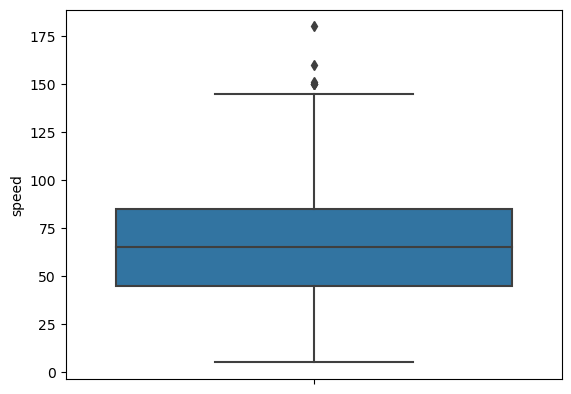

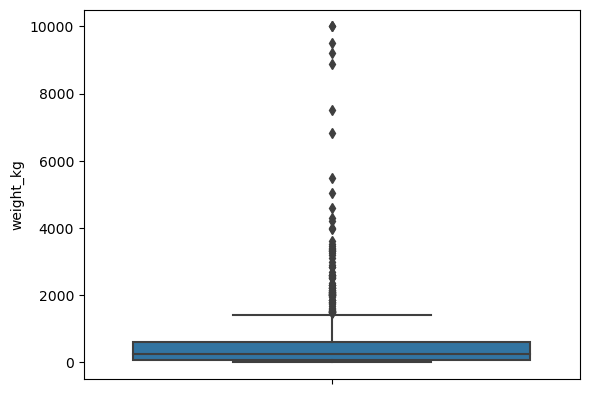

In [57]:
sns.boxplot(data=df,y='speed')
plt.show()
sns.boxplot(data=df,y='weight_kg')
plt.show()

Moostrem el nombre de dades que tenen un pes superior a 1000kg: 
122

Boxplot de pesos inferiors a 1000kg:


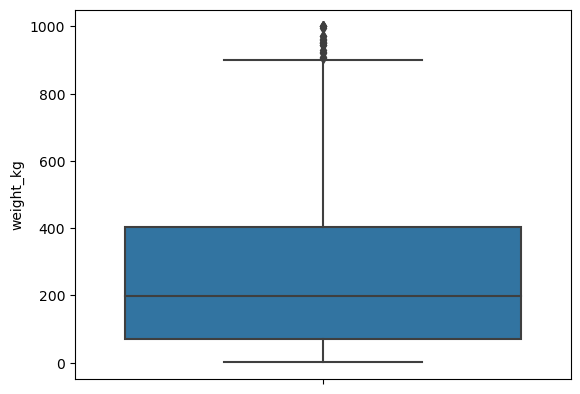

In [67]:
df['weight_kg'] = df['weight_kg'].astype(float)
print("Moostrem el nombre de dades que tenen un pes superior a 1000kg: ")
print(len(df[df['weight_kg'] >= 1000]))
print("\nBoxplot de pesos inferiors a 1000kg:")
sns.boxplot(data=df[df['weight_kg'] <= 1000],y='weight_kg')
plt.show()

**Substituim els strings del tipus per un valor assignat per a classificar-los**

In [15]:
df['type1'] = df['type1'].replace(['normal'], ['1'])
df['type1'] = df['type1'].replace(['fighting'], ['2'])
df['type1'] = df['type1'].replace(['flying'], ['3'])
df['type1'] = df['type1'].replace(['poison'], ['4'])
df['type1'] = df['type1'].replace(['ground'], ['5'])
df['type1'] = df['type1'].replace(['rock'], ['6'])
df['type1'] = df['type1'].replace(['bug'], ['7'])
df['type1'] = df['type1'].replace(['ghost'], ['8'])
df['type1'] = df['type1'].replace(['steel'], ['9'])
df['type1'] = df['type1'].replace(['fire'], ['10'])
df['type1'] = df['type1'].replace(['water'], ['11'])
df['type1'] = df['type1'].replace(['grass'], ['12'])
df['type1'] = df['type1'].replace(['electric'], ['13'])
df['type1'] = df['type1'].replace(['psychic'], ['14'])
df['type1'] = df['type1'].replace(['ice'], ['15'])
df['type1'] = df['type1'].replace(['dragon'], ['16'])
df['type1'] = df['type1'].replace(['dark'], ['17'])
df['type1'] = df['type1'].replace(['fairy'], ['18'])

df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,weight_kg,generation,is_legendary
0,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,2.000,...,10,50.000,50,35,45,90,5,1,1,0
1,1.000,1.000,1.000,1.000,1.000,2.000,1.000,1.000,0.000,1.000,...,30,50.000,19,25,35,72,1,4,1,0
2,1.000,1.000,1.000,0.000,1.000,2.000,0.500,0.500,1.000,4.000,...,40,50.000,74,30,30,20,6,20,1,0
3,1.000,1.000,1.000,1.000,1.000,2.000,1.000,1.000,0.000,1.000,...,40,50.000,52,50,40,90,1,4,1,0
4,1.000,4.000,1.000,1.000,1.000,0.000,1.000,1.000,4.000,1.000,...,80,206.536,720,170,130,80,14,9,6,1


In [16]:
print("Valors unics type1: ", df['type1'].unique(), "\n")


Valors unics type1:  ['5' '1' '6' '14' '10' '13' '4' '7' '18' '9' '8' '12' '11' '16' '17' '15'
 '2' '3'] 



In [17]:
y = df['type1'] 
print(y)

0       5
1       1
2       6
3       1
4      14
       ..
796    16
797     6
798     9
799     9
800    11
Name: type1, Length: 801, dtype: object


**Mirem la correlació entre les variables que ens poden ser més interessants**

In [22]:
print(df.columns)

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'defense',
       'experience_growth', 'height_m', 'hp', 'percentage_male',
       'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1',
       'weight_kg', 'generation', 'is_legendary'],
      dtype='object')


In [33]:
df_plot = df.copy(deep=True)
df_plot.drop(['base_egg_steps'], inplace=True, axis=1)
df_plot.drop(['base_happiness'], inplace=True, axis=1)
df_plot.drop(['base_total'], inplace=True, axis=1)
df_plot.drop(['capture_rate'], inplace=True, axis=1)
df_plot.drop(['experience_growth'], inplace=True, axis=1)
df_plot.drop(['height_m'], inplace=True, axis=1)
df_plot.drop(['percentage_male'], inplace=True, axis=1)
df_plot.drop(['pokedex_number'], inplace=True, axis=1)
df_plot.drop(['weight_kg'], inplace=True, axis=1)
df_plot.drop(['generation'], inplace=True, axis=1)
df_plot.drop(['is_legendary'], inplace=True, axis=1)

print(df_plot.columns)

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'defense', 'hp',
       'sp_attack', 'sp_defense', 'speed', 'type1'],
      dtype='object')


**Mostramos algunos de los pairplots debido al tiempo que consume mostrarlos todos juntos**

<Figure size 640x480 with 0 Axes>

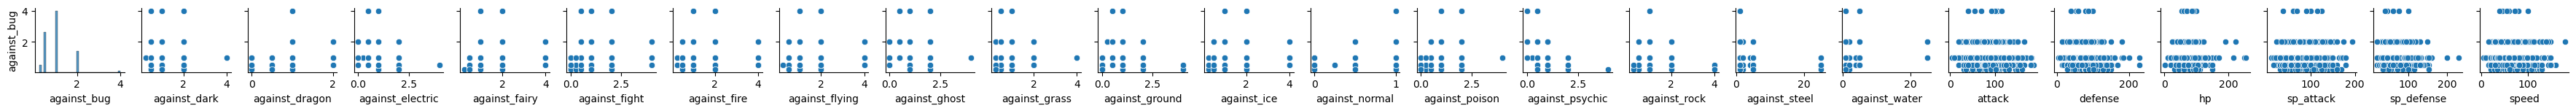

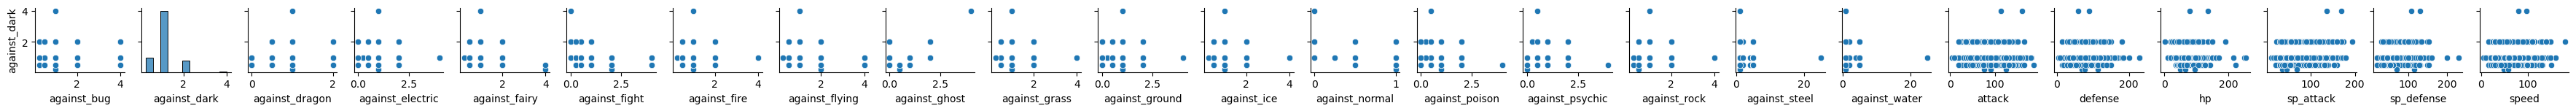

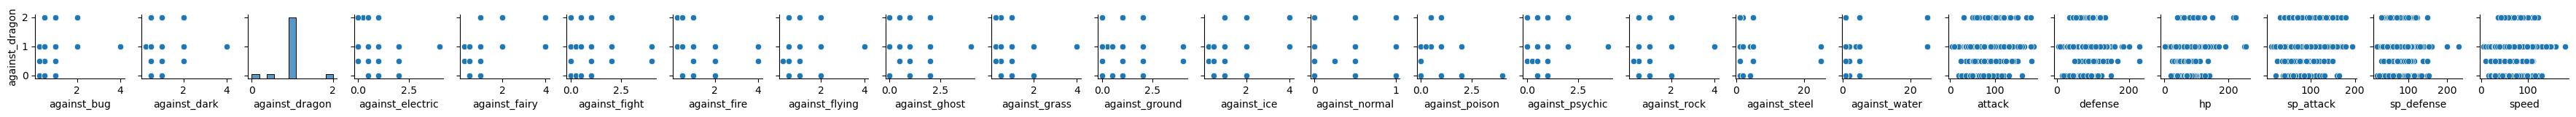

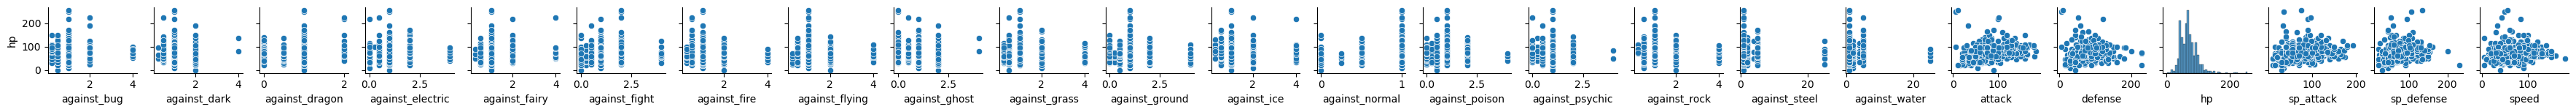

In [32]:
sns.pairplot(df_plot, y_vars=["against_bug"], height=1.5)
plt.show()
sns.pairplot(df_plot, y_vars=["against_dark"], height=1.5)
plt.show()
sns.pairplot(df_plot, y_vars=["against_dragon"], height=1.5)
plt.show()
sns.pairplot(df_plot, y_vars=["hp"], height=1.5)
plt.show()

**Comprovem que les mostres de cada tipus estiguin equilibrades**

### 2. Preprocessing (normalitzation, outlier removal, feature selection..)
Un cop vistes les dades de les que es disposa, per tal de tenir un aprenentatge més eficient, es recomana normalitzar les dades i treure outliers. Segons la tipologia de dades, es poden filtrar atributs, aplicar-hi reductors de dimensionalitat, codificar categories textuals en valors numèrics..

Navegueu per la [documentació de sklearn sobre preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) per tal de trobar les diferents opcions que proporciona sklearn.

**Preguntes:**
* Estàn les dades normalitzades? Caldria fer-ho?
* En cas que les normalitzeu, quin tipus de normalització será més adient per les vostres dades?
* Teniu gaires dades sense informació? Els NaNs a pandas? Tingueu en compte que hi ha metodes que no els toleren durant el aprenentatge. Com afecta a la classificació si les filtrem? I si les reompliu? Com ho farieu? [Pista](https://scikit-learn.org/stable/modules/impute.html)
* Teniu dades categoriques? Quina seria la codificació amb més sentit? (`OrdinalEncoder`, `OneHotEncoder`, d'altres?)
* Caldria aplicar `sklearn.decomposition.PCA`? Quins beneficis o inconvenients trobarieu?
* Es poden aplicar `PolynomialFeatures` per millorar la classificació? En quins casos té sentit fer-ho?

### 3. Model Selection
La tasca d'aquesta pràctica s'enmarca dins l'aprenentatge computacional **supervisat**. A sklearn, disposem de varies tècniques [(veure documentació)](https://scikit-learn.org/stable/supervised_learning.html). A les classes de teoria, hem vist varies tècniques, com ara logistic regression, SVM amb diferents kernels, Nearest Neighbour, i el perceptró...
En aquesta secció heu de valorar quina o quines tècniques voleu fer servir, aixi com també explicar el per què les heu seleccionat. Recomanem, que per entendre millor la teoria, s'ha de provar com a mínim un model de SVM.

**Preguntes:**
* Quins models heu considerat?
* Considereu les SVM amb els diferents kernels implementats.
* Quin creieu que serà el més precís?
* Quin serà el més ràpid?
* Seria una bona idea fer un `ensemble`? Quins inconvenients creieu que pot haver-hi? [Documentació](https://scikit-learn.org/stable/modules/ensemble.html)

### 4. Crossvalidation
Un cop seleccionats quins models es volen testejar sobre les dades, s'han de poder evaluar correctament. Per aquests motius, haurem d'aprendre a cros-validar els resultats.
Reviseu la [documentació](https://scikit-learn.org/stable/modules/cross_validation.html) i escolliu quin tipus de crossvalidació pot ser l'adecuada pel vostre problema.

**Preguntes:**
* Per què és important cross-validar els resultats?
* Separa la base de dades en el conjunt de train-test. Com de fiables serán els resultats obtinguts? En quins casos serà més fiable, si tenim moltes dades d'entrenament o poques?
* Quin tipus de K-fold heu escollit? Quants conjunts heu seleccionat (quina k)? Com afecta els diferents valors de k?
* Es viable o convenient aplicar `LeaveOneOut`?


### 5. Metric Analysis
En aquest apartat ens centrarem en les mètriques de classificació ([documentació](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)).

**Preguntes:**
* A teoria, hem vist el resultat d'aplicar el `accuracy_score` sobre dades no balancejades. Podrieu explicar i justificar quina de les següents mètriques será la més adient pel vostre problema? `accuracy_score`, `f1_score` o `average_precision_score`.
* Mostreu la Precisió-Recall Curve i la ROC Curve. Quina és més rellevant pel vostre dataset? Expliqueu amb les vostres paraules, la diferencia entre una i altre [Pista](https://stats.stackexchange.com/questions/338826/auprc-vs-auc-roc)
* Què mostra [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)? Quina métrica us fixareu per tal de optimitzar-ne la classificació pel vostre cas?

### 6. Hyperparameter Search
El motiu d'aplicar crossvalidació durant l'entrenament és que ens permet conèixer quin serà el resultat esperat del nostre model un cop en producció, és a dir, com es comportarà sobre dades mai vistes abans.
A més, també ens permet optimitzar quins són els hiperparametres dels models que millor funcionaran en el futur test.

**Preguntes:**
* Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? [documentació](https://scikit-learn.org/stable/modules/grid_search.html)
* Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels dos métodes creieu que obtindrà millor resultat final?
* Existeixen altres mètodes de búsqueda més eficients ([scikit-optimize](https://scikit-optimize.github.io/stable/))?
* Feu la prova, i amb el model i el metode de crossvalidació escollit, configureu els diferents metodes de búsqueda per a que s'executin durant el mateix temps (i.e. depenent del problema, 0,5h-1 hora). Analitzeu quin ha arribat a una millor solució. (estimeu el temps que trigarà a fer 1 training, i aixi trobeu el número de intents que podeu fer en cada cas.)

